# Visualize Dose Response Curves

In `2.fit-dose.R`, I fit Hill equations (4 parameter logistic model) to every compound-cell health model dose curve.

Here, I summarize the results with a series of visualizations.

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
source(file.path("scripts", "dose_utils.R"))

In [2]:
figure_dir <- file.path("figures", "dose_response")

## Load Data

In [3]:
moa_file <- file.path("repurposing_cellhealth_shiny", "data", "moa_cell_health_modz.tsv.gz")

moa_cols <- readr::cols(
  .default = readr::col_double(),
  Image_Metadata_Well = readr::col_character(),
  Metadata_broad_core_id = readr::col_character(),
  Metadata_broad_sample = readr::col_character(),
  Metadata_dose_recode = readr::col_integer(),
  pert_id = readr::col_character(),
  pert_iname = readr::col_character(),
  pert_type = readr::col_character(),
  moa = readr::col_character()
)

moa_df <- readr::read_tsv(moa_file, col_types = moa_cols)
moa_long_df <- moa_df %>% reshape2::melt(id.vars = c(
  "Image_Metadata_Well",
  "Metadata_broad_core_id",
  "Metadata_broad_sample",
  "Metadata_dose_recode",
  "Metadata_mmoles_per_liter",
  "umap_x",
  "umap_y",
  "pert_id",
  "pert_iname",
  "pert_type",
  "moa"),
  variable.name = "model",
  value.name = "model_score"
)

print(dim(moa_long_df))
head(moa_long_df, 3)

[1] 660380     13


,Image_Metadata_Well,Metadata_broad_core_id,Metadata_broad_sample,Metadata_dose_recode,Metadata_mmoles_per_liter,umap_x,umap_y,pert_id,pert_iname,pert_type,moa,model,model_score
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>
1,collapsed,BRD-A00147595,BRD-A00147595-001-01-5,1,0.04115226,-1.3160720,0.6908637,BRD-A00147595,balaglitazone,trt_cp,Insulin sensitizer|PPAR receptor partial agonist,cell_health_modz_target_cc_all_n_spots_mean,-0.1899445
2,collapsed,BRD-A00147595,BRD-A00147595-001-01-5,2,0.12345679,0.9882369,2.0605938,BRD-A00147595,balaglitazone,trt_cp,Insulin sensitizer|PPAR receptor partial agonist,cell_health_modz_target_cc_all_n_spots_mean,0.2360403
3,collapsed,BRD-A00147595,BRD-A00147595-001-01-5,3,0.37037037,0.5819897,1.6056529,BRD-A00147595,balaglitazone,trt_cp,Insulin sensitizer|PPAR receptor partial agonist,cell_health_modz_target_cc_all_n_spots_mean,0.2607753


In [4]:
dose_file <- file.path("results", "dose_response_curve_fit_results.tsv")

dose_cols <- readr::cols(
    .default = readr::col_character(),
    slope = readr::col_double(),
    slope_error = readr::col_double(),
    slope_t = readr::col_double(),
    slope_p = readr::col_double(),
    ic_fifty = readr::col_double(),
    ic_fifty_error = readr::col_double(),
    ic_fifty_t = readr::col_double(),
    ic_fifty_p = readr::col_double(),
    residual = readr::col_double()
)

dose_df <- readr::read_tsv(dose_file, col_types = dose_cols)

print(dim(dose_df))
head(dose_df, 3)

[1] 109900     16


compound,model,pert_id,pert_iname,moa,slope,slope_error,slope_t,slope_p,ic_fifty,ic_fifty_error,ic_fifty_t,ic_fifty_p,residual,status,ic_fifty_transform
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
BRD-K13646352-001-03-8,cell_health_modz_target_cc_edu_pos_n_objects,BRD-K13646352,midostaurin,FLT3 inhibitor|KIT inhibitor|PKC inhibitor,3.098363,0.01499697,206.5993,2.342756e-05,-0.6878270,0.001991994,-345.2957,8.387106e-06,9.020602e-07,fit,0.6207881926004601
BRD-K68488863-001-04-9,cell_health_modz_target_cc_all_nucleus_area_mean,BRD-K68488863,ENMD-2076,Aurora kinase inhibitor|FLT3 inhibitor|VEGFR inhibitor,-2.328780,0.01598114,-145.7204,4.708996e-05,0.8325399,0.003956926,210.4007,2.258869e-05,2.671773e-06,fit,1.7808177400075589
BRD-K23190681-001-01-1,cell_health_modz_target_cc_g2_ph3_neg_high_n_spots_h2ax_mean,BRD-K23190681,av-412,NA,-4.134805,NaN,NaN,NaN,2.2408913,NaN,NaN,NaN,3.169486e-06,fit,4.726889906976141


## Generate Summary Figure

In [5]:
residual_gg <- ggplot(dose_df, aes(x = residual)) +
    geom_density(fill="grey") +
    theme_bw() +
    xlab("Residual of Dose Curve Fit") +
    ylab("Density")

summary_gg <- ggplot(dose_df, aes(x = slope_t, y = -log10(slope_p))) +
    geom_point(alpha = 0.5, size = 0.3, pch = 19, color = "black", fill = "black") +
    theme_bw() +
    xlab("Slope Fit Statistic") +
    ylab("-log10 Slope p Value")

ic_fifty_p_density_gg <- ggplot(dose_df, aes(x = -log10(ic_fifty_p))) +
    geom_density(fill = "grey") +
    theme_bw() +
    coord_flip() +
    xlab("") +
    ylab("Density")

Warning message:
“Removed 29165 rows containing missing values (geom_point).”Warning message:
“Removed 18687 rows containing non-finite values (stat_density).”Warning message:
“Removed 140 rows containing non-finite values (stat_density).”

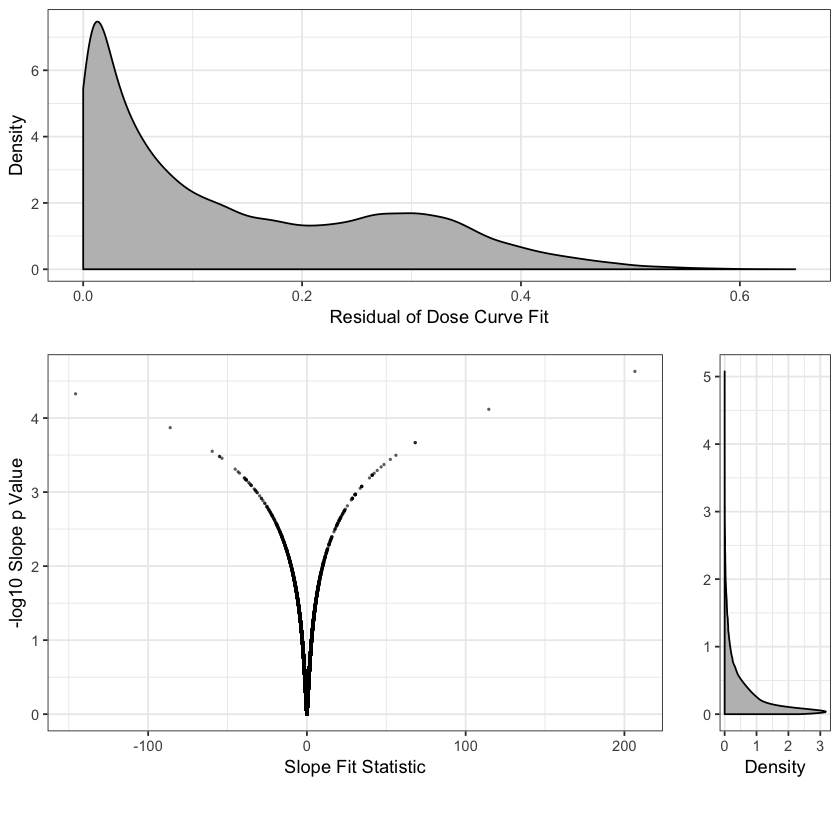

In [6]:
output_file <- file.path(figure_dir, "dose_summary.png")

dose_summary_gg <- cowplot::plot_grid(
    residual_gg,
    cowplot::plot_grid(
        summary_gg,
        ic_fifty_p_density_gg,
        ncol = 2,
        nrow = 1,
        align = "h",
        rel_widths = c(0.8, 0.2)
    ),
    nrow = 2,
    align = "h",
    rel_heights = c(0.4, 0.6)
)

cowplot::save_plot(output_file, dose_summary_gg, base_height = 5, base_width = 5)

dose_summary_gg

## Plot Several Examples

In [7]:
dose_curve_theme <- theme(
    axis.text.x = element_text(size = 4),
    axis.text.y = element_text(size = 6),
    axis.title = element_text(size = 8)
)

In [8]:
get_dose_curve <- function(moa_long_df, dose_df, model, pert_name, cell_health_model) {
    compound <- unique(
    dose_df %>%
        dplyr::filter(pert_iname == !!pert_name) %>%
        dplyr::pull(compound)
    )[1]

    example_curve <- get_curve_fit(moa_long_df, dose_df, compound, model)

    # Sample data
    newdata <- expand.grid(conc=exp(seq(log(0.04), log(10), length=1000)))
    # predictions and confidence intervals
    pm <- stats::predict(example_curve$fit, newdata=newdata, level = 0.95, interval="confidence")
    newdata$p <- pm[,1]
    newdata$pmin <- pm[,2]
    newdata$pmax <- pm[,3]

    dose_curve_gg <- ggplot(example_curve$moa,
                            aes(x = Metadata_mmoles_per_liter, y = model_score_transform)) +
        geom_point(size = 0.5) +
        coord_trans(x="log10") +
        geom_ribbon(data=newdata, aes(x=conc, y=p, ymin=pmin, ymax=pmax), alpha=0.2) +
        geom_line(data=newdata, aes(x=conc, y=p), lwd = 0.5) +
        theme_bw() +
        xlab(paste0("Micromoles per Liter\n", pert_name)) +
        ylab(paste0("Cell Health Model\n", cell_health_model))

    return(dose_curve_gg)
}

In [9]:
model <- "cell_health_modz_target_vb_ros_mean"
pert_name <- "bortezomib"
bortezomib_gg <- get_dose_curve(moa_long_df, dose_df, model, pert_name, "ROS Mean") + dose_curve_theme

Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c()

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

In [10]:
model <- "cell_health_modz_target_cc_g1_n_spots_mean"
cell_health_model <- "DNA Damage in G1 Cells"
pert_name <- "MLN-4924"
mln_g1_gg <- get_dose_curve(moa_long_df, dose_df, model, pert_name, cell_health_model) + dose_curve_theme

Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c()

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

In [11]:
model <- "cell_health_modz_target_cc_edu_pos_n_objects"
cell_health_model <- "Number of Proliferating Cells"
pert_name <- "midostaurin"
midostaurin_edu_gg <- get_dose_curve(moa_long_df, dose_df, model, pert_name, cell_health_model) + dose_curve_theme

Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c()

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”Warning message in (tquan * sqrt(varVal + sumObjRV)) * c(-1, 1):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c(

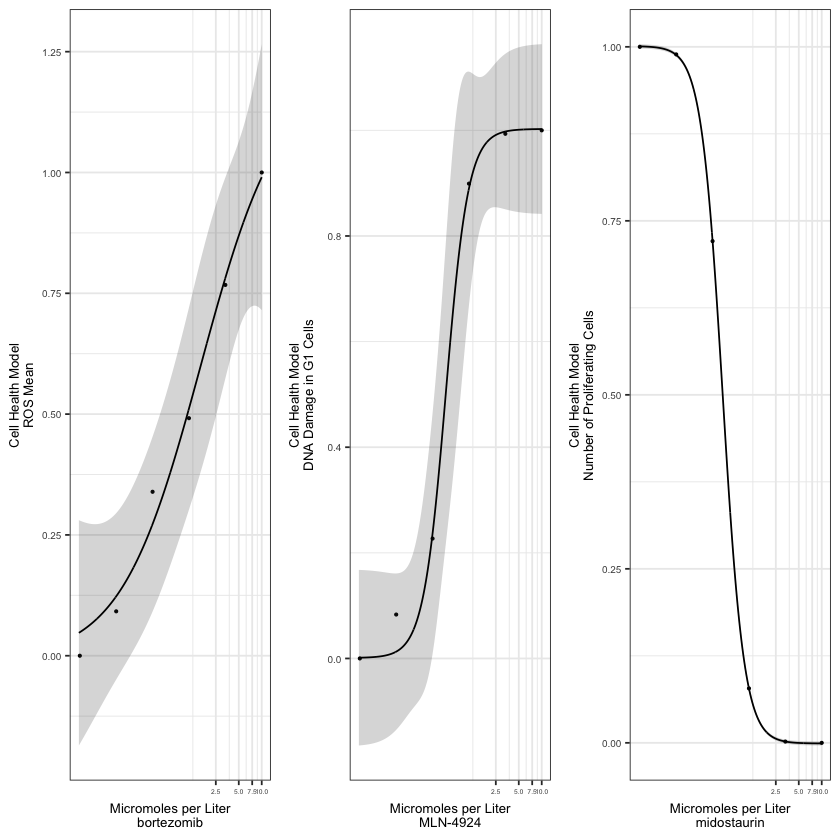

In [12]:
output_file <- file.path(figure_dir, "select_dose_examples.png")

dose_examples_gg <- cowplot::plot_grid(
    bortezomib_gg,
    mln_g1_gg,
    midostaurin_edu_gg,
    nrow = 1,
    ncol = 3,
    align = "v"
)

cowplot::save_plot(output_file, dose_examples_gg, base_height = 3, base_width = 8.5)

dose_examples_gg